In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np
import re


In [100]:
time_results = pd.read_csv("results_heuristiques/time_heuristic_false.csv")
value_results = pd.read_csv("results_heuristiques/value_heuristic_false.csv")

heuristics_codes = ["CW", "2opt", "3opt", "hybrid_rc", "hybrid_mc"]
heuristics_names =["Clark-Wright", "2-opt on each route", "3-opt on each route", "Swap 2opt between routes (Real cost)","Swap 2opt between routes (Max cost)"]
value_results.columns

Index(['n', 'CW', 'LK', '2opt', '3opt', 'hybrid_rc', 'hybrid_mc', 'borne_inf'], dtype='object')

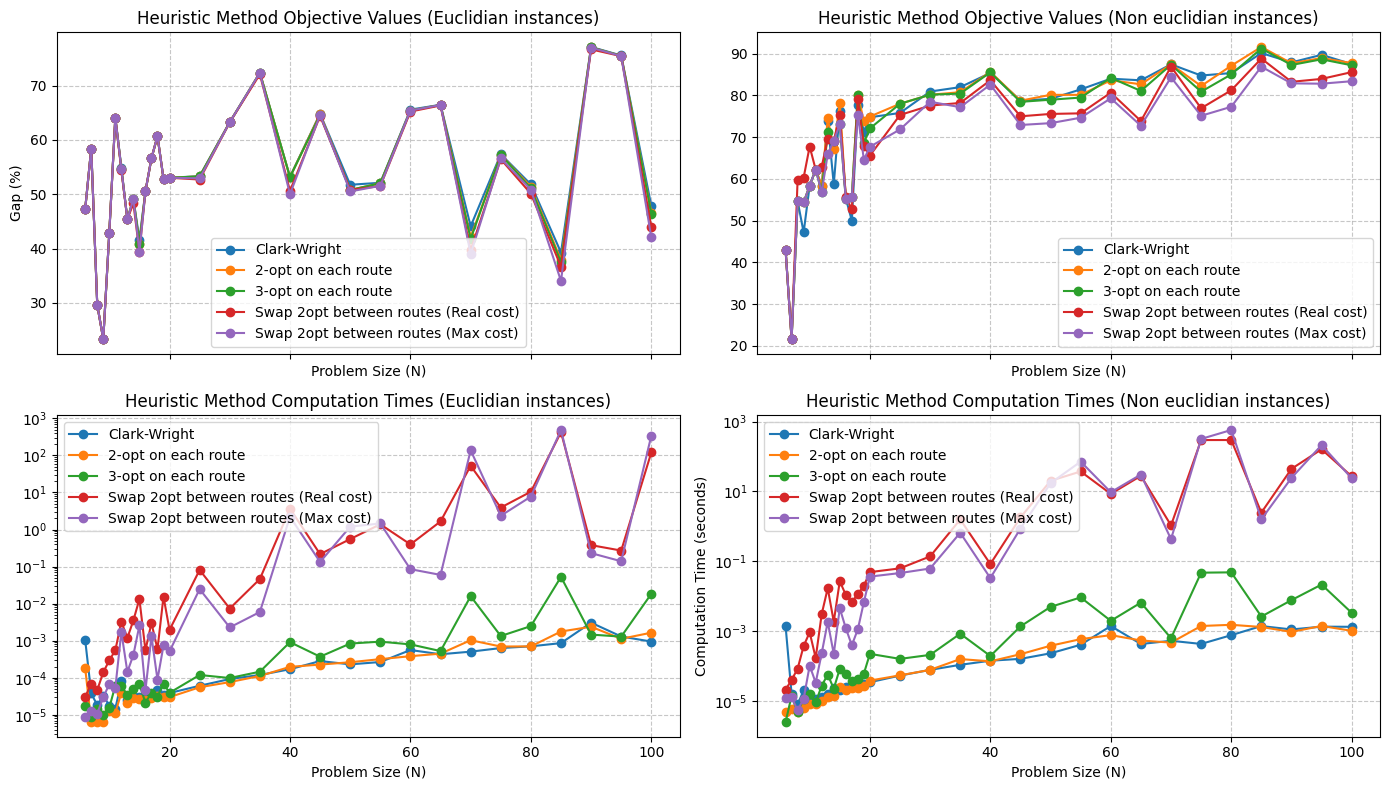

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données
value_results_true = pd.read_csv("results_heuristiques/value_heuristic_true.csv")
value_results_false = pd.read_csv("results_heuristiques/value_heuristic_false.csv")
time_results_true = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
time_results_false = pd.read_csv("results_heuristiques/time_heuristic_false.csv")

# Créer une figure avec 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8),sharex=True)#, sharey='row')

# Graphique 1 : Valeurs objectives des heuristiques (true)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = value_results_true.n.values
    Y = 100 * (value_results_true[code].values - value_results_true["borne_inf"].values) / value_results_true[code].values
    axes[0, 0].plot(N, Y, label=name, marker='o')

axes[0, 0].set_xlabel('Problem Size (N)')
axes[0, 0].set_ylabel('Gap (%)')
axes[0, 0].set_title('Heuristic Method Objective Values (Euclidian instances)')
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Graphique 2 : Valeurs objectives des heuristiques (false)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = value_results_false.n.values
    Y = 100 * (value_results_false[code].values - value_results_false["borne_inf"].values) / value_results_false[code].values
    axes[0, 1].plot(N, Y, label=name, marker='o')

axes[0, 1].set_xlabel('Problem Size (N)')
axes[0, 1].set_ylabel('Gap (%)')
axes[0, 1].set_title('Heuristic Method Objective Values (Non euclidian instances)')
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Graphique 3 : Temps de calcul des heuristiques (false)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = time_results_false.n.values
    axes[1, 1].semilogy(N, time_results_false[code].values, label=name, marker='o')

axes[1, 1].set_xlabel('Problem Size (N)')
axes[1, 1].set_title('Heuristic Method Computation Times (Non euclidian instances)')
axes[1, 0].set_ylabel('Computation Time (seconds)')
axes[1, 1].set_ylabel('Computation Time (seconds)')
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Graphique 4 : Temps de calcul des heuristiques (true)
for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    N = time_results_true.n.values
    axes[1, 0].semilogy(N, time_results_true[code].values, label=name, marker='o')

axes[1, 0].set_xlabel('Problem Size (N)')
axes[1, 0].set_title('Heuristic Method Computation Times (Euclidian instances)')
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Ajuster la disposition
plt.tight_layout()
plt.show()


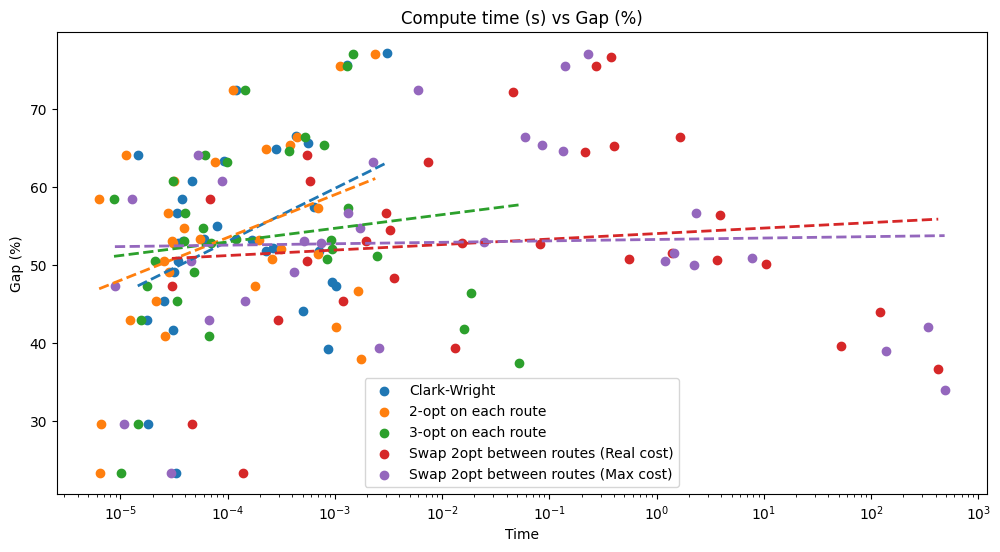

In [104]:
plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    
    Y = 100 * (value_results_true[code].values - value_results_true["borne_inf"].values) / value_results_true[code].values
    X = time_results_true[code].values
    log_X = [np.log10(x) for x in X]

    X_reshaped = np.array(log_X).reshape(-1, 1)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_reshaped, Y)
    
    plt.scatter(X, Y, label=name, marker='o')
    
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_log = [np.log10(x) for x in X_range]
    Y_pred = reg.predict(X_range_log)
    
    # Plot the regression line
    plt.plot(X_range, Y_pred, linewidth=2, ls='--')

# Set y-axis to logarithmic scale
plt.xscale('log')

plt.xlabel("Time")
plt.ylabel("Gap (%)")
plt.title("Compute time (s) vs Gap (%)")
plt.legend()
plt.show()


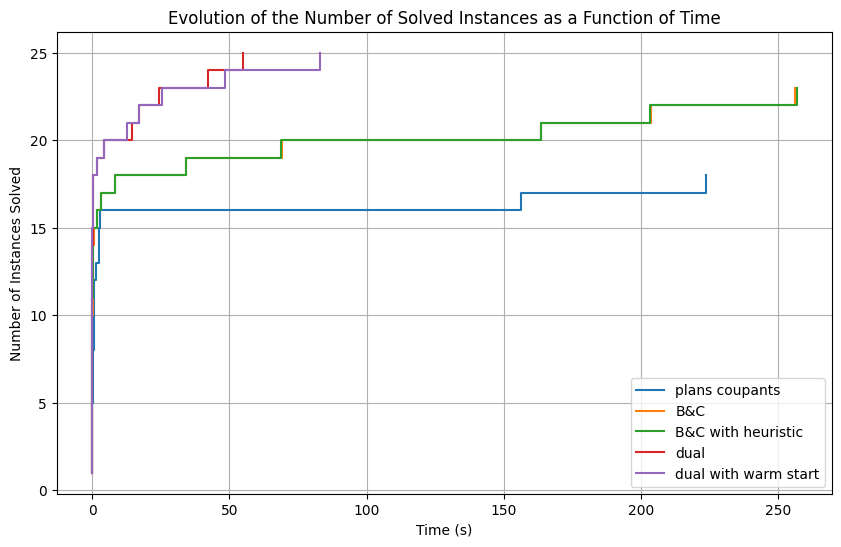

In [105]:
df = pd.read_csv("results_exact_methods/results_time.csv")

methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

for method in methods:
    # Extract the times (in seconds) for this method.
    times = df[method].values
    # Sort the times in ascending order.
    times_sorted = np.sort(times)
    times_filtered = times_sorted[times_sorted < 299]    
    # The cumulative count at each time is just 1, 2, …, N (number of instances)
    cumulative_counts = np.arange(1, len(times_filtered) + 1)
    
    # Plot a step function. The 'where="post"' argument ensures the step changes occur after the value.
    plt.step(times_filtered, cumulative_counts, where='post', label=method)

#plt.xscale('log')
plt.xlabel("Time (s)")
plt.ylabel("Number of Instances Solved")
plt.title("Evolution of the Number of Solved Instances as a Function of Time")
plt.legend()
plt.grid(True)
plt.show()


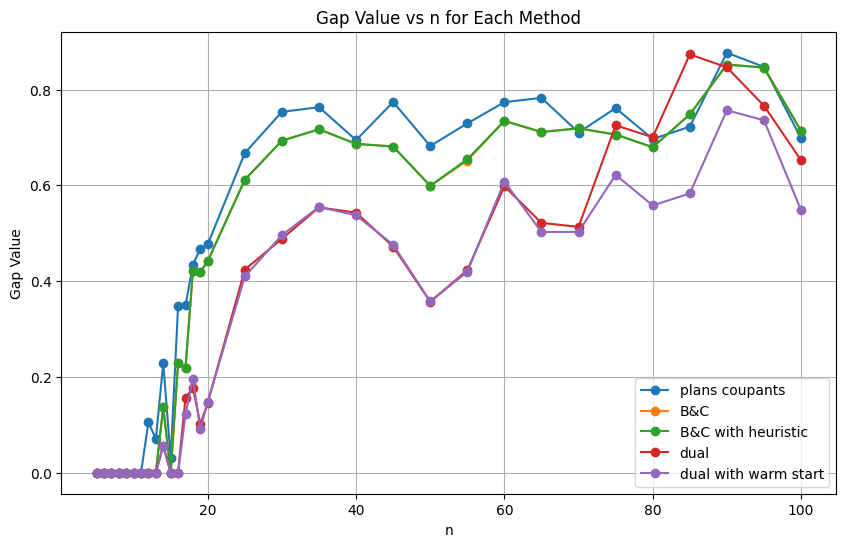

In [106]:
# Load the CSV file (adjust the file name/path as needed)
df = pd.read_csv("results_exact_methods/results_gap.csv")

# If you want one curve per method (averaging over the 'euclidien' column),
# group the data by 'n' and compute the mean for each method.
grouped = df.groupby("n").mean().reset_index()

# List of method columns to plot (these should match your CSV headers)
methods = [
    "plans coupants",
    "B&C",
    "B&C with heuristic",
    "dual",
    "dual with warm start"
]

plt.figure(figsize=(10, 6))

# Plot a line (curve) for each method
for method in methods:
    plt.plot(grouped["n"], grouped[method], marker='o', label=method)

plt.xlabel("n")
plt.ylabel("Gap Value")
plt.title("Gap Value vs n for Each Method")
plt.legend()
plt.grid(True)
plt.show()


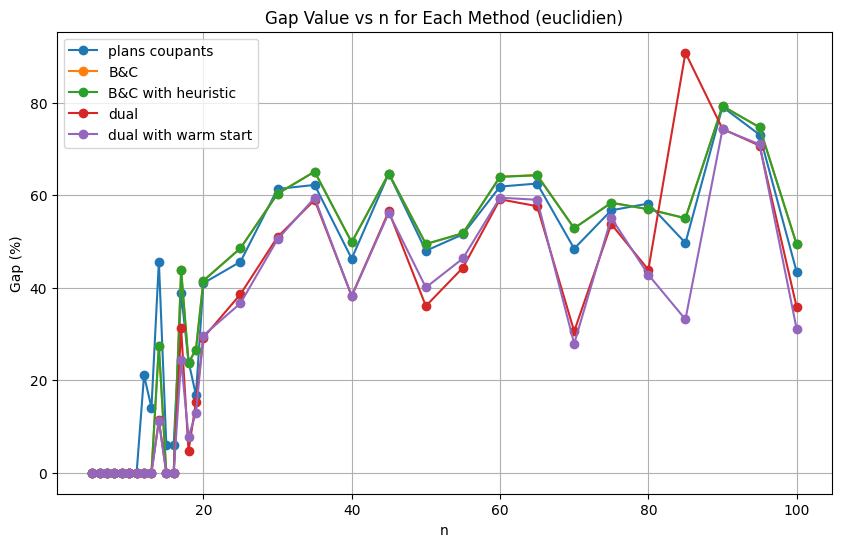

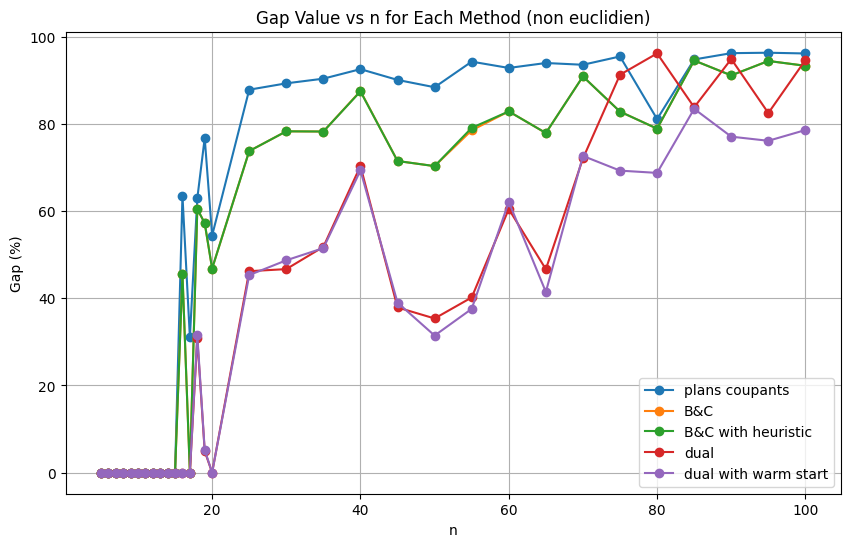

In [107]:
# For euclidien == true:
df_true = df[df["euclidien"] == True].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (euclidien)")
plt.legend()
plt.grid(True)
plt.show()

df_true = df[df["euclidien"] == False].groupby("n").mean().reset_index()

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (non euclidien)")
plt.legend()
plt.grid(True)
plt.show()

In [111]:
import pandas as pd
import re

def extract_data_from_file(file_name):
    # Read the content of the file
    with open(file_name, 'r') as file:
        data = file.read()

    # Extract the relevant information using regular expressions
    pattern = r"File: data/n_(\d+)-euclidean_(true|false).*Meilleure borne\s*:\s*([\d.]+)"
    matches = re.findall(pattern, data)

    # Create a DataFrame
    df = pd.DataFrame(matches, columns=['n', 'euclidien', 'borne_inf'])
    df['n'] = df['n'].astype(int)  # Convert 'n' to integer
    df['borne_inf'] = df['borne_inf'].astype(float)  # Convert 'borne_inf' to float

    return df

def merge_dataframes(df_text, value_results_true, value_results_false):
    # Select only the necessary columns from the CSV DataFrames
    value_results_true = value_results_true[['n', '3opt']]
    value_results_false = value_results_false[['n', '3opt']]

    # Rename columns to avoid conflicts
    value_results_true.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)
    value_results_false.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)

    # Merge the DataFrames
    merged_df_true = pd.merge(df_text[df_text['euclidien'] == 'true'], value_results_true, on=['n'], how='left')
    merged_df_false = pd.merge(df_text[df_text['euclidien'] == 'false'], value_results_false, on=['n'], how='left')

    # Combine the results
    combined_df = pd.concat([merged_df_true, merged_df_false], ignore_index=True)

    # Calculate the gap
    combined_df['gap'] = ((combined_df['sol_heuristique'] - combined_df['borne_inf']) / combined_df['sol_heuristique']) * 100

    # Select the desired columns
    final_df = combined_df[['n', 'euclidien', 'sol_heuristique', 'borne_inf', 'gap']]

    return final_df

# Example usage
df_text = extract_data_from_file('results_exact_methods/borne_inf.txt')
value_results_true = pd.read_csv('results_heuristiques/value_heuristic_true.csv')
value_results_false = pd.read_csv('results_heuristiques/value_heuristic_false.csv')
final_df = merge_dataframes(df_text, value_results_true, value_results_false)
#final_df


/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_99601/640877414.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_results_true.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)
/var/folders/87/1h0l3ncd481b0x7jwccs058w0000gn/T/ipykernel_99601/640877414.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_results_false.rename(columns={'3opt': 'sol_heuristique'}, inplace=True)


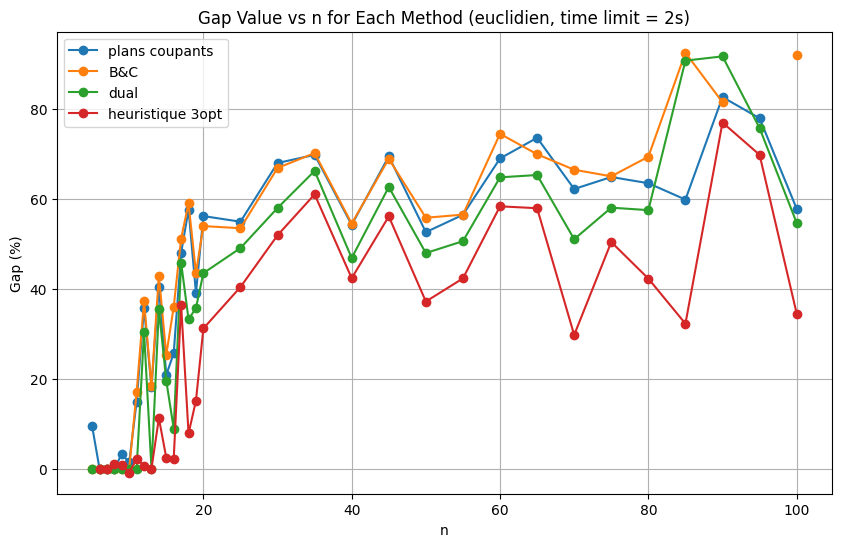

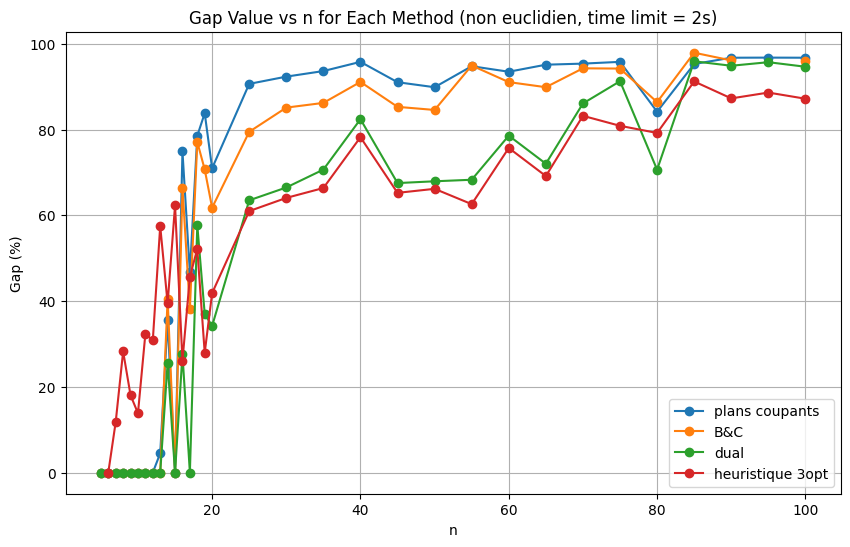

In [124]:
df = pd.read_csv("results_exact_methods/results_gap_2.0.csv")


# For euclidien == true:
df_true = df[df["euclidien"] == True].groupby("n").mean().reset_index()
final_df_true = final_df[final_df["euclidien"] == "true"]

methods = [
    "plans coupants",
    "B&C",
    "dual"
]

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.plot(final_df_true["n"], final_df_true["gap"], marker='o', label="heuristique 3opt")
plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (euclidien, time limit = 2s)")
plt.legend()
plt.grid(True)
plt.show()

df_true = df[df["euclidien"] == False].groupby("n").mean().reset_index()
final_df_true = final_df[final_df["euclidien"] == "false"]

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(df_true["n"], df_true[method]*100, marker='o', label=method)
plt.plot(final_df_true["n"], final_df_true["gap"], marker='o', label="heuristique 3opt")

plt.xlabel("n")
plt.ylabel("Gap (%)")
plt.title("Gap Value vs n for Each Method (non euclidien, time limit = 2s)")
plt.legend()
plt.grid(True)
plt.show()